# Task

Using `train.csv` dataset by Sberbank (Russian Housing Market – https://www.kaggle.com/c/sberbank-russian-housing-market/data), perform two linear regression models for `price_doc` prediction (use both numeric and categorical independent variables in your models). Justify your choice and models' quality with supporting tests, charts and comments briefly.

In [28]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None)
df = pd.read_csv('train.csv')

#to get an understanding of data obtained
df.head(5)

#if you want to see all columns name clearly
# colnames=df.columns.tolist()
# colnames

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [30]:
#getting rid of data features with high variation 
ds = df.drop(['id', 'timestamp'], axis = 1)

#converting categorical data to dummies
ds = pd.get_dummies(data=ds, drop_first=True)

#defining data features with the biggest amount of NA
df.isna().sum().sort_values(ascending=False).head(10)

hospital_beds_raion           14441
build_year                    13605
state                         13559
cafe_avg_price_500            13281
cafe_sum_500_max_price_avg    13281
cafe_sum_500_min_price_avg    13281
max_floor                      9572
material                       9572
num_room                       9572
kitch_sq                       9572
dtype: int64

In [31]:
#dropping those with more than 10000 NA and then the rest
ds=ds.drop(['hospital_beds_raion','build_year','state', 'cafe_avg_price_500','cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg'],axis=1)
ds = ds.dropna()

## Sampling
As 2 models have to be performed, 2 ways to do that were defined:<br>
– first model is based on mannually selected features (chosen intuitively and by common sense)<br>
– second is based on automatically defined features (f_regression is used)

In [32]:
#1st model sampling

#as features were defined intuitively and by common sense there is an examples of how indexes needed were obtained
# print(ds.columns.get_loc('num_room'))
# print(ds.columns.get_loc('full_sq'))
# print(ds.columns.get_loc('floor'))
# print(ds.columns.get_loc('metro_min_walk'))
#the result: 5, 0, 2, 71

#creating new dataframe that consists only features we want to include 
#268 is our dependent var (price_doc) column 
#269-415 metro station dummmies
ds1_1=ds.iloc[:,[0,2,5,71]]
ds1_2=ds.iloc[:,268:415]
ds1=pd.concat([ds1_1,ds1_2],axis=1)

x1=ds1.drop(['price_doc'],axis=1).iloc[:,:].values
y1=ds1.iloc[:,ds1.columns.get_loc('price_doc')].values

from sklearn.model_selection import train_test_split
trainX1, testX1, trainY1, testY1 = train_test_split(x1, y1, test_size=0.2)

print('cheking sizes of samples\n for regressors:', trainX1.shape, '\n for predictions in train:', trainY1.shape, '\nfor regressors:' ,testX1.shape, '\nfor predictions in test:', testY1.shape) 

cheking sizes of samples
 for regressors: (10656, 150) 
 for predictions in train: (10656,) 
for regressors: (2664, 150) 
for predictions in test: (2664,)


In [33]:
#2nd model

x2 = ds.drop(['price_doc'], axis=1).values
y2 = ds.iloc[:, ds.columns.get_loc('price_doc')].values
trainX2, testX2, trainY2, testY2 = train_test_split(x2, y2, test_size=0.2)

print('cheking sizes of samples\n', 'for regressors:', trainX2.shape, '\nfor predictions in train:', trainY2.shape, '\nfor regressors:' ,testX2.shape, '\nfor predictions in test:', testY2.shape, '\n')

#as 2nd model was defined to be based on automatically selected features, 
#f_regression is going to be applied to define statistically significant ones

from sklearn.feature_selection import SelectKBest, f_regression
ft=SelectKBest(f_regression, k = 8).fit(trainX2, trainY2)
trainX2_ft = ft.transform(trainX2)
testX2_ft = ft.transform(testX2)

# to see selected features
for2 = ds.columns[ft.get_support(indices = True)]
print('Automatically selected features:', for2, '\n')

print("Checking sizes of new train and test samples after selecting variables:", trainX2_ft.shape, testX2_ft.shape,)

cheking sizes of samples
 for regressors: (10656, 430) 
for predictions in train: (10656,) 
for regressors: (2664, 430) 
for predictions in test: (2664,) 

Automatically selected features: Index(['full_sq', 'life_sq', 'num_room', 'office_sqm_5000',
       'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500',
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_high'],
      dtype='object') 

Checking sizes of new train and test samples after selecting variables: (10656, 8) (2664, 8)


/Users/User/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/User/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


## 1st model 
Features were defined intuitively and by common sense

In [34]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression(fit_intercept=True).fit(trainX1, trainY1)
print('M1 intercept:', model1.intercept_)

M1 intercept: 1473094.8008651687


In [35]:
print('M1 coefficients\n', pd.DataFrame(model1.coef_, ds1.drop(['price_doc'], axis=1).columns, columns=["Coefficients"]))

M1 coefficients
                             Coefficients
full_sq                     1.537576e+05
floor                       6.339322e+04
num_room                   -5.236172e+04
metro_min_walk             -2.022108e+04
product_type_OwnerOccupier  1.161558e+05
...                                  ...
sub_area_Vyhino-Zhulebino  -2.184514e+06
sub_area_Zamoskvorech'e     3.451201e+06
sub_area_Zapadnoe Degunino -2.457796e+06
sub_area_Zjablikovo        -2.343515e+06
sub_area_Zjuzino           -1.283220e+06

[150 rows x 1 columns]


## 2nd model
Automatically defined features

In [36]:
model2=LinearRegression(fit_intercept=True).fit(trainX2_ft, trainY2)
print('M2 intercept:', model2.intercept_)

M2 intercept: -1367213.7550908262


In [37]:
print('M2 coefficients\n',pd.DataFrame(model2.coef_, ds.columns[ft.get_support(indices = True)], columns=["Coefficients"]))

M2 coefficients
                              Coefficients
full_sq                     189179.883889
life_sq                     -30175.612556
num_room                   -147411.846653
office_sqm_5000                  0.626520
cafe_count_5000_price_1000    5184.429135
cafe_count_5000_price_1500   -9149.473076
cafe_count_5000_price_2500   -4916.915948
cafe_count_5000_price_high   62928.292474


## Predictions and their accuracy

<function matplotlib.pyplot.show(*args, **kw)>

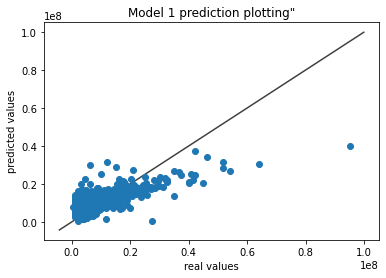

In [38]:
predY1=model1.predict(testX1)
predY2=model2.predict(testX2_ft)

#1st model
fig, ax = plt.subplots() 

plt.scatter(testY1, predY1)
plt.title('Model 1 prediction plotting"')
plt.xlabel('real values')
plt.ylabel('predicted values')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

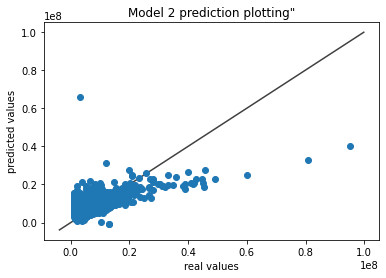

In [39]:
#2nd model
fig, ax = plt.subplots() 

plt.scatter(testY2, predY2)
plt.title('Model 2 prediction plotting"')
plt.xlabel('real values')
plt.ylabel('predicted values')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

plt.show

In [40]:
mod1_rsq=model1.score(trainX1, trainY1)
mod2_rsq=model2.score(trainX2_ft, trainY2)
print("R^2 model1: {:.2f} \nR^2 model2: {:.2f}".format(mod1_rsq, mod2_rsq))

R^2 model1: 0.55 
R^2 model2: 0.51


It turned out that the model with mannually defined features has higher R-squared (the difference is not that big though). However, both models showed satisfactory results. 